In [3]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [4]:
losses = []
torch.manual_seed(42)

In [5]:
torch.cuda.is_available()

True

In [6]:
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([0,1,1,0], dtype = torch.float32)

In [7]:
class xor(nn.Module):
    def __init__(self):
        super(xor,self).__init__()
        self.l1 = nn.Linear(2,2,bias=True)
        self.sig1 = nn.Sigmoid()
        self.l2 = nn.Linear(2,1,bias = True)
        self.sig2 = nn.Sigmoid()
    def forward(self, x):
        x = self.l1(x)
        x = self.sig1(x)
        x = self.l2(x)
        #x = self.sig2(x)
        return x

In [8]:
class mydata(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, id):
        return self.x[id].to(torch.device("cuda")), self.y[id].to(torch.device("cuda"))

In [9]:
data = mydata(x,y)
batch = 1
loader = DataLoader(data, batch_size = batch, shuffle = True)
device = torch.device("cuda")
model = xor().to(device)
print(model)

xor(
  (l1): Linear(in_features=2, out_features=2, bias=True)
  (sig1): Sigmoid()
  (l2): Linear(in_features=2, out_features=1, bias=True)
  (sig2): Sigmoid()
)


In [10]:
loss = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.03)


In [11]:
def train_one_epoch(index):
    total = 0
    for i, data in enumerate(loader):
        inputs, labels = data
        optim.zero_grad()
        outputs = model(inputs)
        l = loss(outputs.flatten(), labels)
        l.backward()
        optim.step()
        total += l.item()
    return total/len(loader)/batch

In [12]:
epochs = 10000
for epoch in range(epochs):
    model.train(True)
    l = train_one_epoch(model)
    losses.append(l)
    if epoch%1000==0:
        print(f"epoch: {epoch}\nLoss:{l}\n")

epoch: 0
Loss:0.301132844761014

epoch: 1000
Loss:0.27038102224469185

epoch: 2000
Loss:0.27022553235292435

epoch: 3000
Loss:0.26847536861896515

epoch: 4000
Loss:0.26516806334257126

epoch: 5000
Loss:0.22409657016396523

epoch: 6000
Loss:0.0001402673997290549

epoch: 7000
Loss:1.2700951401711791e-11

epoch: 8000
Loss:3.2152058793144533e-12

epoch: 9000
Loss:3.0020430585864233e-12



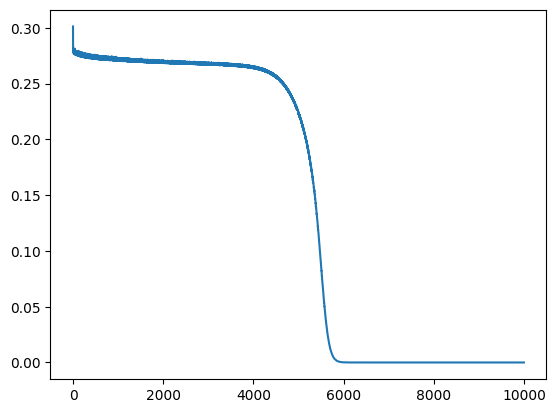

In [16]:
plt.plot(losses)

In [14]:
def sigmoid(x):
    return 1.0/(1+torch.exp(-x))


In [20]:
test = torch.tensor([0,0], dtype = torch.float32).to(device)
answer = 1
layer1 = torch.matmul(model.l1.weight, test) + model.l1.bias
layer1 = sigmoid(layer1)
layer2 = torch.matmul(model.l2.weight, layer1) + model.l2.bias
layer2 = sigmoid(layer2)
print(layer2)

tensor([0.5000], device='cuda:0', grad_fn=<MulBackward0>)
